In [5]:
# !unzip house_prices.zip

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_train = pd.read_csv('train.csv')

In [8]:
print(df_train.shape)

(1460, 81)


In [9]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [13]:
# check for dupes for Id
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [14]:
#drop id col
df_train.drop(['Id'],axis=1,inplace=True)

In [15]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploring the Target Variable

In [16]:
# descriptive statistics

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

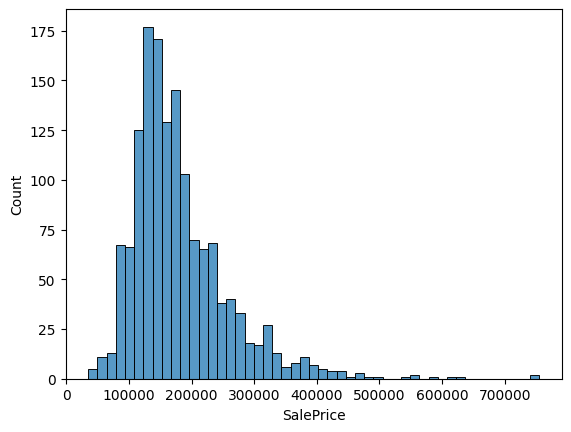

In [17]:
# histogram

sns.histplot(df_train['SalePrice'])

# Relationship Between the Target Variable and Predictors

In [18]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

In [19]:
# variables that could be useful in predicting sale price:
# OverallQual - a tricky variable, an interesting exercise would be to predict 'OverallQual' using all the other variables available
# YearBuilt
# Neighborhood
# TotalBsmtSF
# GrLivArea


#check the relationship of these variables with the target variable SalePrice.

# Numerical Variables

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

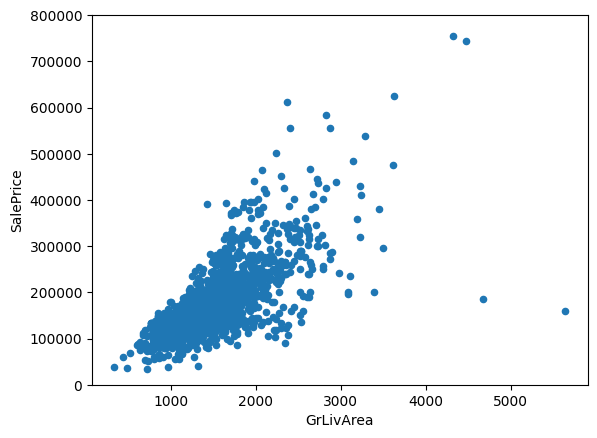

In [20]:
#scatter plot grlivarea vs. SalePrice

var = 'GrLivArea'
data = df_train[['SalePrice', var]]
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

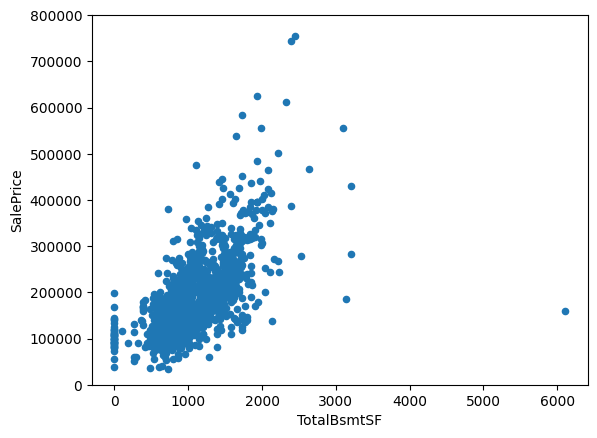

In [21]:
#scatter plot totalbsmtsf/saleprice

var = 'TotalBsmtSF'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

# Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

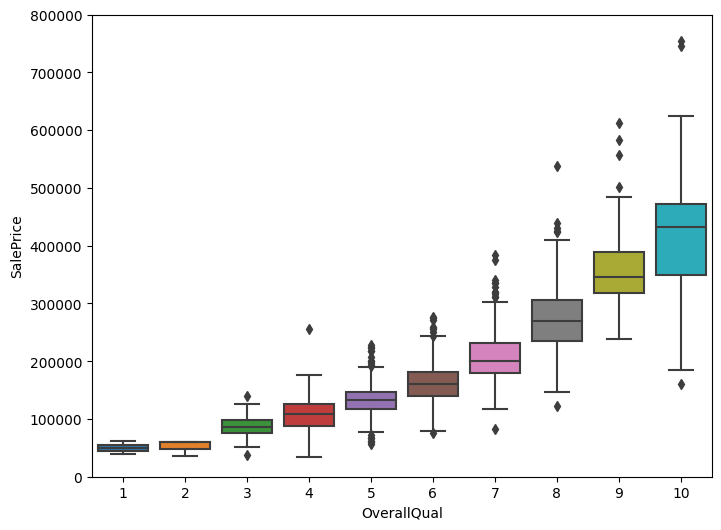

In [22]:
# overallqual
var = 'OverallQual'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

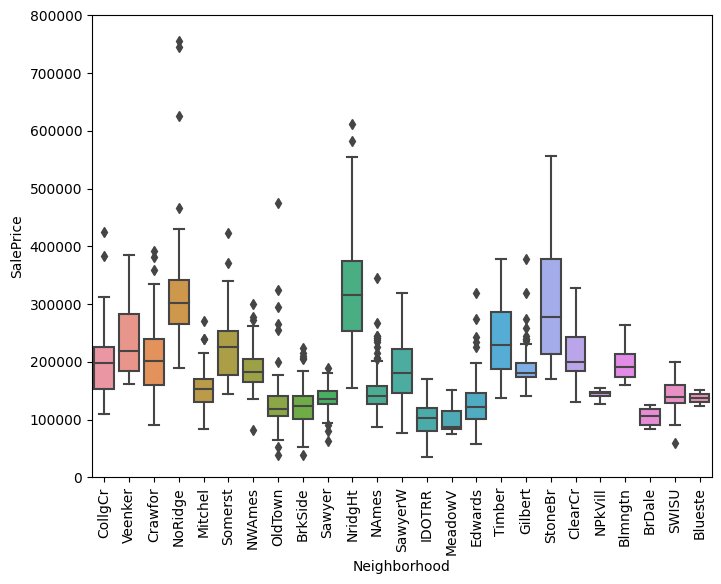

In [23]:
# Neighborhood
var = 'Neighborhood'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

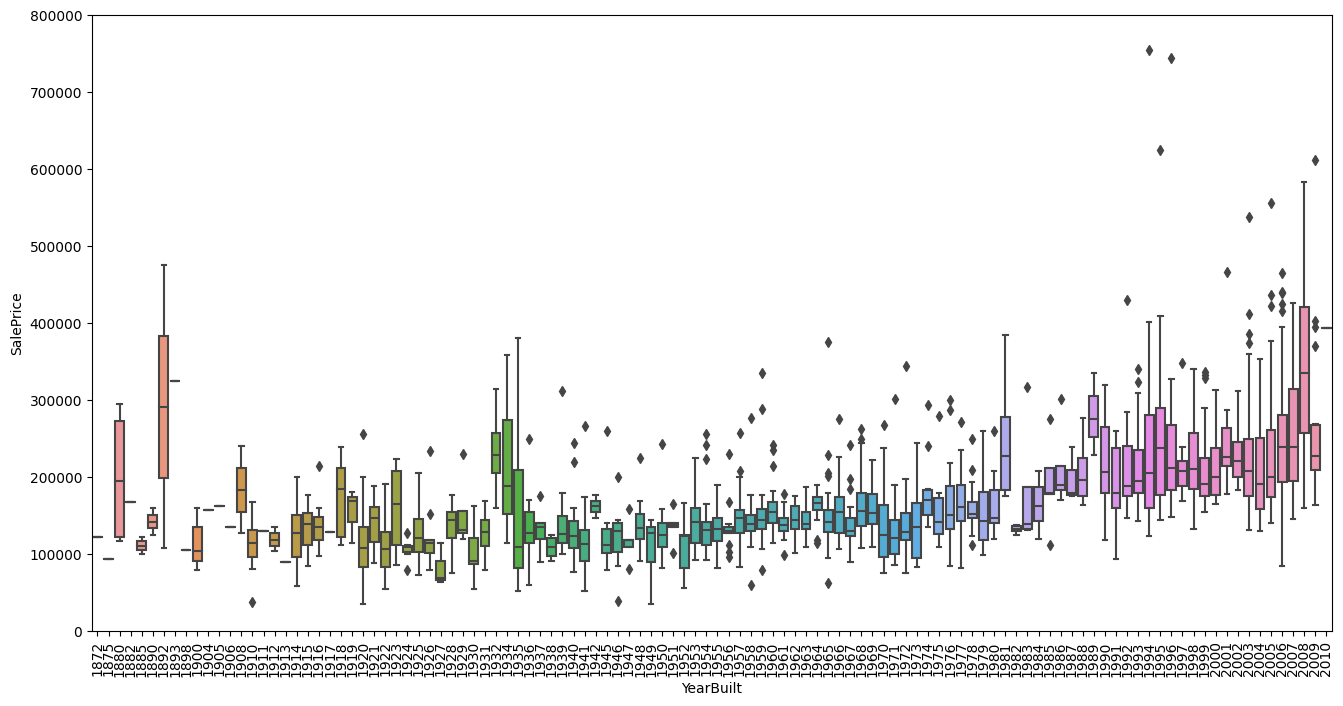

In [24]:
# YearBuilt
var = 'YearBuilt'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

# Multivariate Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_17920\2365860041.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


<AxesSubplot: >

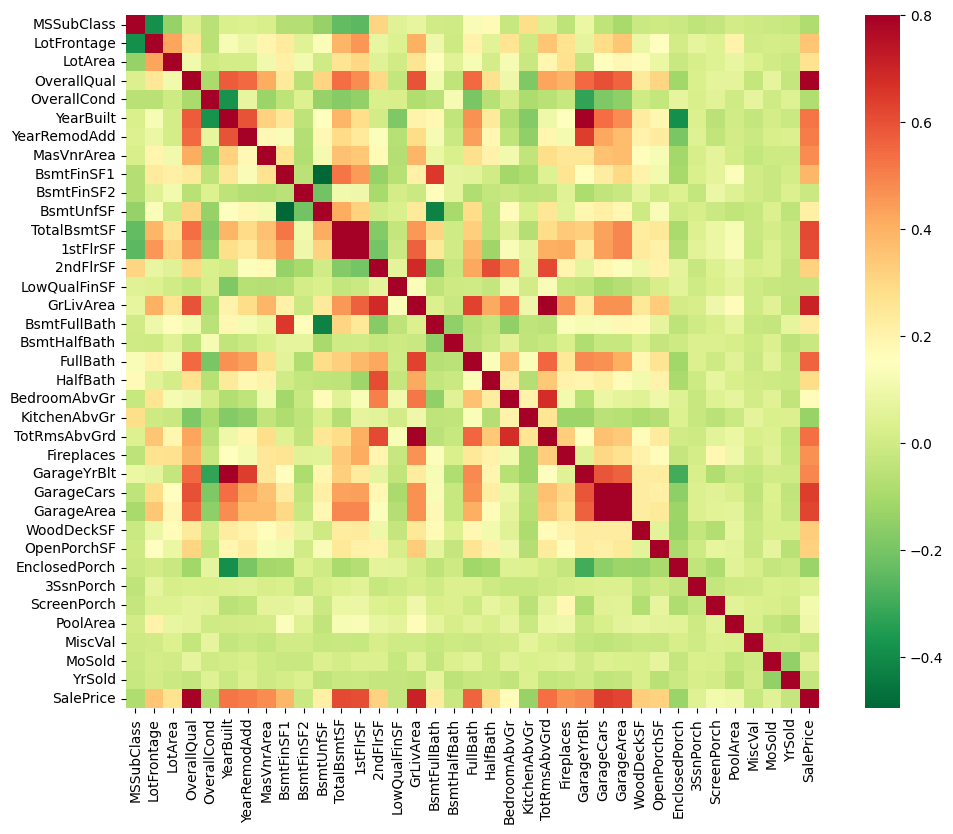

In [25]:
# correlation matrix

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

C:\Users\User\AppData\Local\Temp\ipykernel_17920\2852781176.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


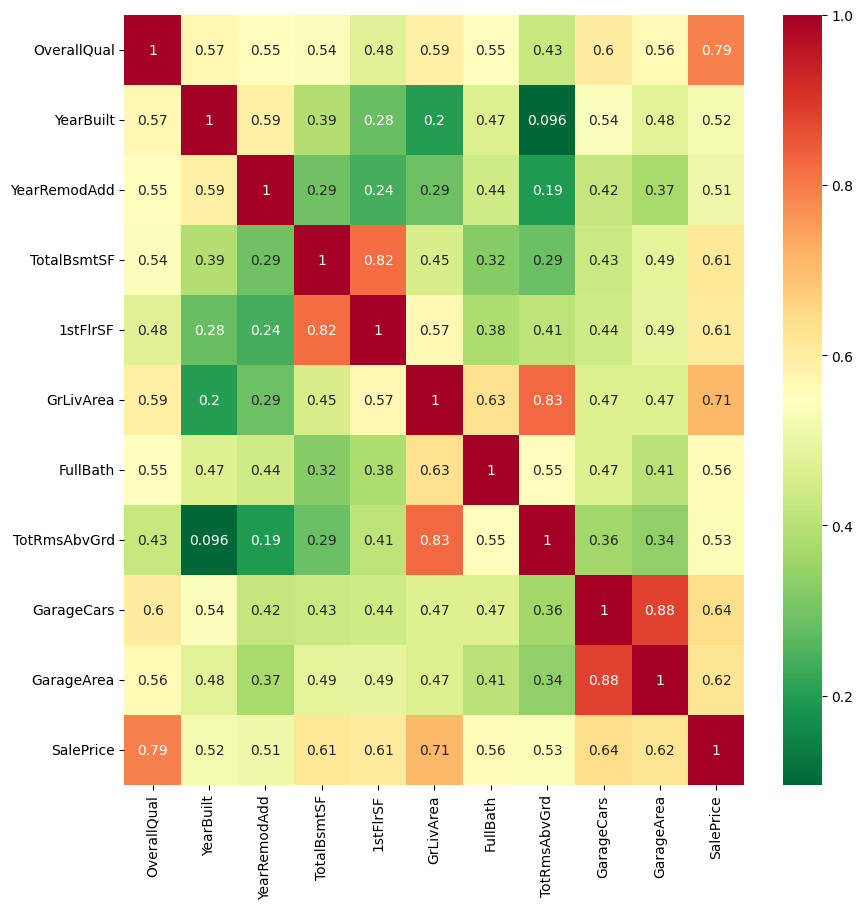

In [26]:
# most correlated features with SalePrice
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

# Outlier Detection

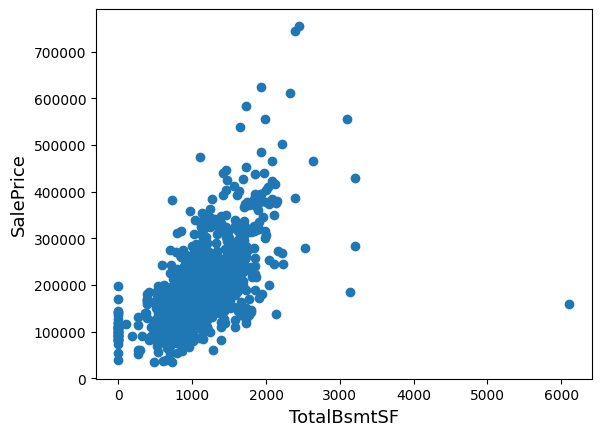

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

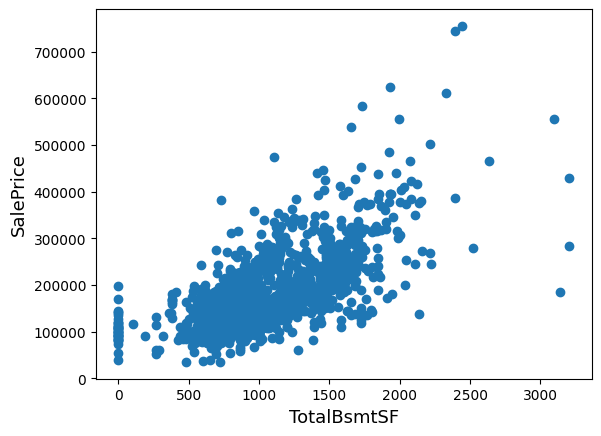

In [28]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

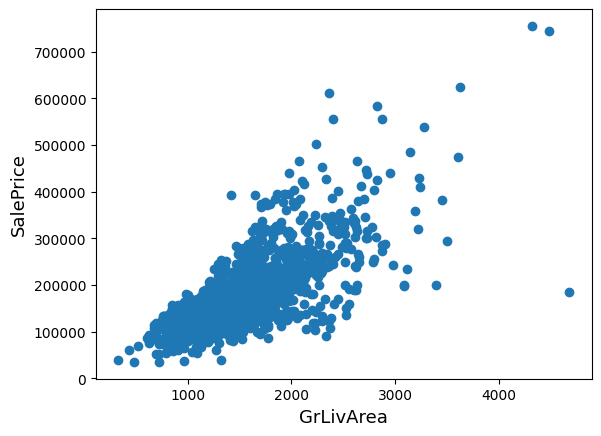

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

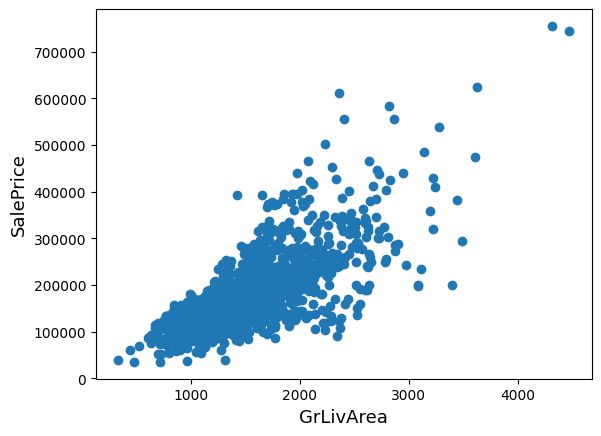

In [30]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Null Value Replacement

In [31]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageYrBlt,81,0.055556
GarageCond,81,0.055556
GarageType,81,0.055556
GarageFinish,81,0.055556


In [32]:
# drop 5 columns with the biggest ratio of null values
to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

In [33]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]

Electrical       object
GarageCond       object
LotFrontage     float64
BsmtFinType2     object
BsmtFinType1     object
MasVnrArea      float64
MasVnrType       object
BsmtQual         object
GarageType       object
BsmtExposure     object
GarageYrBlt     float64
GarageQual       object
GarageFinish     object
BsmtCond         object
dtype: object

In [34]:
# Numeric Variables

num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

In [35]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

# Object (String) Variables

In [36]:
# 2. for categorical variables:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()

In [37]:
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

In [38]:
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

In [39]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSSubClass,0,0.0
BedroomAbvGr,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
HalfBath,0,0.0


# Variable Transformation

## Numeric Variables

In [40]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

In [41]:
num_feats

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage_missing_ind',
 'MasVnrArea_missing_ind',
 'GarageYrBlt_missing_ind']

C:\Users\User\AppData\Local\Temp\ipykernel_17920\2008405520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["1stFlrSF"])


<AxesSubplot: xlabel='1stFlrSF', ylabel='Density'>

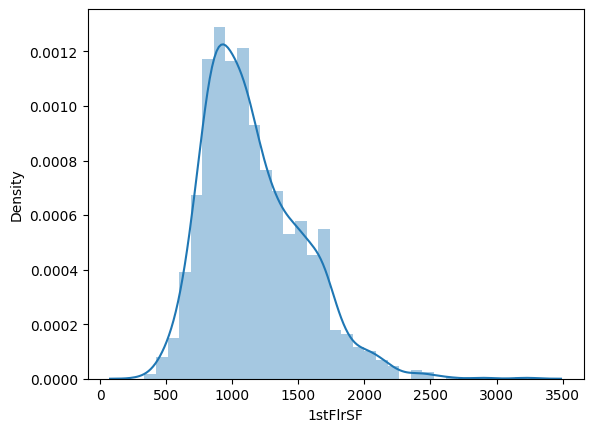

In [42]:
# transform features that are skewed

sns.distplot(df_train["1stFlrSF"])

C:\Users\User\AppData\Local\Temp\ipykernel_17920\1761015038.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["1stFlrSF_log"])


<AxesSubplot: xlabel='1stFlrSF_log', ylabel='Density'>

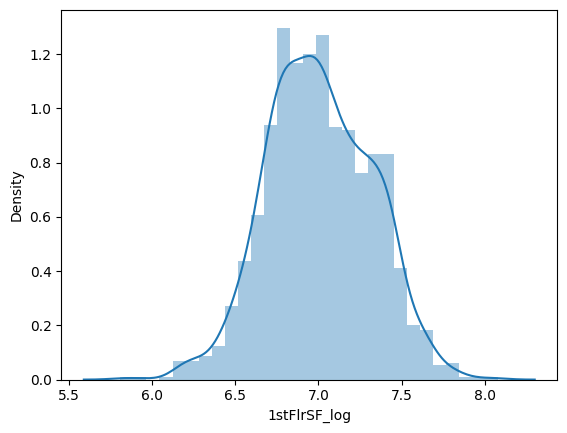

In [43]:
# log transformation
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.distplot(df_train["1stFlrSF_log"])

In [44]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats+["1stFlrSF_log"]].astype(float)))

In [45]:
# fit_transform returns data typenumpy.array so once we convert results back to Pandas DataFrame there won't be any original column names. We need to add column names using DataFrame attribute .columns.

print(df_train_scaled.columns)

RangeIndex(start=0, stop=41, step=1)


In [46]:
# Assign original column names to the DataFrame df_train_scaled.

df_train_scaled.columns = num_feats+["1stFlrSF_log"]
print(df_train_scaled.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'LotFrontage_missing_ind',
       'MasVnrArea_missing_ind', 'GarageYrBlt_missing_ind', '1stFlrSF_log'],
      dtype='object')


## String Variables

In [47]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

## Categorical Variables

In [48]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])

In [49]:
df_dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


# Feature Creation

<AxesSubplot: xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

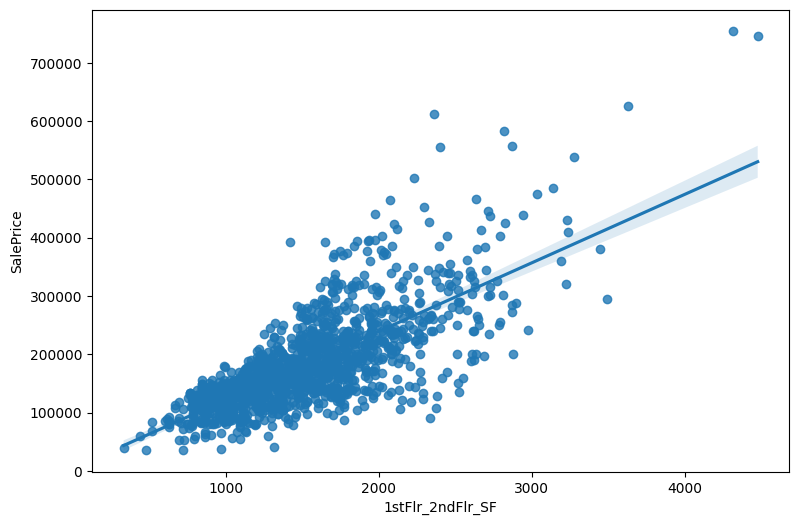

In [50]:
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']


f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

In [51]:
# overall quality of a house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]

In [52]:
df_train["OverallGrade"].head()

0    35
1    48
2    35
3    35
4    40
Name: OverallGrade, dtype: int64

# Simplification of the Existing Features

(-0.5, 5.5, 0.0, 800000.0)

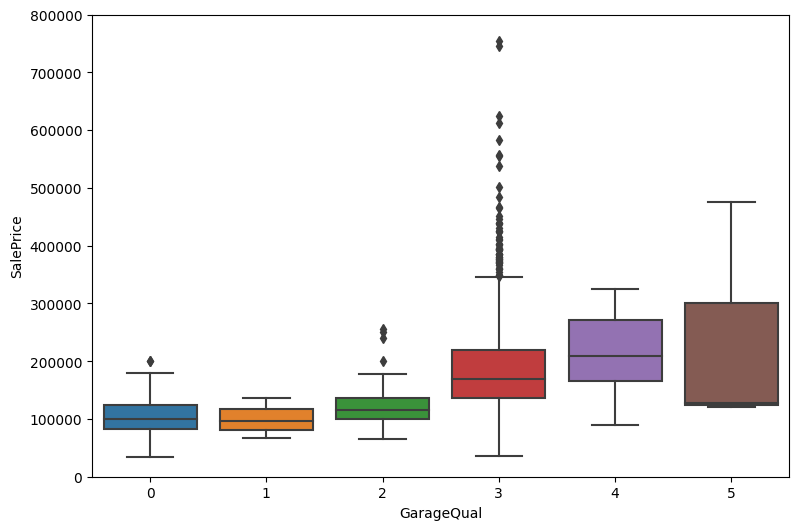

In [53]:
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [54]:
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

(-0.5, 2.5, 0.0, 800000.0)

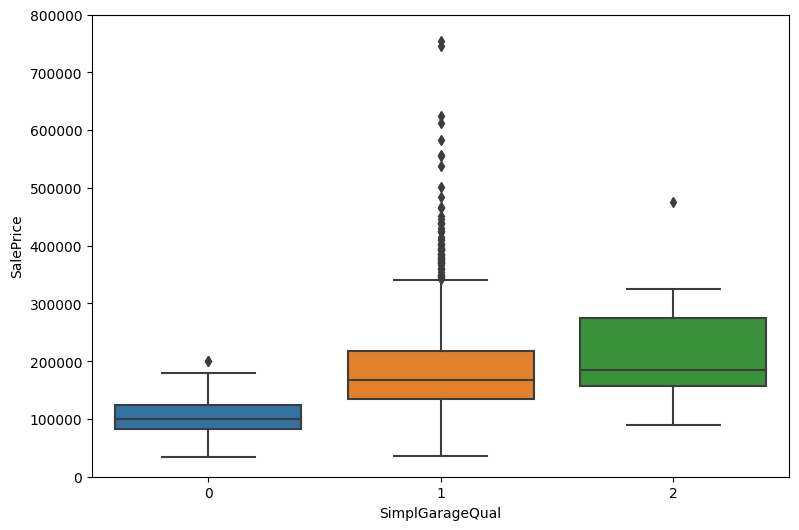

In [55]:
var = 'SimplGarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [56]:
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]

In [57]:
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,MoSold,YrSold,SalePrice,LotFrontage_missing_ind,MasVnrArea_missing_ind,GarageYrBlt_missing_ind,1stFlrSF_log,1stFlr_2ndFlr_SF,OverallGrade,SimplGarageQual
0,60,65.0,8450,2,4,4,3,7,5,2003,...,2,2008,208500,0,0,0,6.752270,1710,35,1
1,20,80.0,9600,2,4,4,3,6,8,1976,...,5,2007,181500,0,0,0,7.140453,1262,48,1
2,60,68.0,11250,2,3,4,3,7,5,2001,...,9,2008,223500,0,0,0,6.824374,1786,35,1
3,70,60.0,9550,2,3,4,3,7,5,1915,...,2,2006,140000,0,0,0,6.867974,1717,35,1
4,60,84.0,14260,2,3,4,3,8,5,2000,...,12,2008,250000,0,0,0,7.043160,2198,40,1


# Variable Selection Tutorial

In [58]:
y = df_numeric.SalePrice
df_numeric.drop("SalePrice",axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17920\944049394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop("SalePrice",axis=1, inplace=True)


In [59]:
df_numeric.shape

(1458, 59)

## Part 1: Removing Features With Small Variance

In [60]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
df_transformed = vt.fit_transform(df_numeric)

In [61]:
df_transformed.shape # deleted 9 features

(1458, 50)

In [62]:
# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = df_numeric.columns[vt.get_support()]
# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

In [63]:
df_transformed.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage_missing_ind,1stFlr_2ndFlr_SF,OverallGrade
0,60.0,65.0,8450.0,4.0,7.0,5.0,2003.0,2003.0,196.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,0.0,1710.0,35.0
1,20.0,80.0,9600.0,4.0,6.0,8.0,1976.0,1976.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0.0,1262.0,48.0
2,60.0,68.0,11250.0,3.0,7.0,5.0,2001.0,2002.0,162.0,4.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,0.0,1786.0,35.0
3,70.0,60.0,9550.0,3.0,7.0,5.0,1915.0,1970.0,0.0,3.0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,0.0,1717.0,35.0
4,60.0,84.0,14260.0,3.0,8.0,5.0,2000.0,2000.0,350.0,4.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,0.0,2198.0,40.0


## Part 2: Removing Correlated Features

In [64]:
# step 1 Calculate a correlation matrix
df_corr = df_transformed.corr().abs()

# step 2 Get pairs of highly correlated features
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# step 3 Remove correlated columns
for idx in indices: #each pair
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [65]:
print(indices)

[('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', '1stFlr_2ndFlr_SF'), ('TotRmsAbvGrd', '1stFlr_2ndFlr_SF'), ('GarageCars', 'GarageArea'), ('GarageQual', 'GarageCond')]


In [66]:
df_transformed.shape # dropped 5 features

(1458, 45)

## Part 3: Forward Regression

In [67]:
from sklearn.feature_selection import f_regression, SelectKBest
skb = SelectKBest(f_regression, k=10)
X = skb.fit_transform(df_transformed, y)

In [68]:
# this will give us the position of top 10 columns
skb.get_support()
# column names
df_transformed.columns[skb.get_support()]
X = pd.DataFrame(X,columns=df_transformed.columns[skb.get_support()])

In [69]:
X.head()

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade
0,7.0,2003.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0
1,6.0,1976.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0
2,7.0,2001.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0
3,7.0,1915.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0
4,8.0,2000.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0


# Predicting House Prices with Linear Regression

## With Statsmodels

In [70]:
import statsmodels.api as sm

In [71]:
# We have to add an intercept to our predictive dataset to also estimate the intercept. If we don't do that the intercept will be considered 0.
X = sm.add_constant(X)

In [72]:
# create a Python object that will represent linear regression:
lin_reg = sm.OLS(y,X)

In [74]:
type(lin_reg)

statsmodels.regression.linear_model.OLS

In [75]:
# fit this using our training data and export the summary of the model:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     732.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:57:15   Log-Likelihood:                -17206.
No. Observations:                1458   AIC:                         3.443e+04
Df Residuals:                    1447   BIC:                         3.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.992e+05   8.93e+04    -10.069   

## With Sklearn

In [76]:
from sklearn.linear_model import LinearRegression

In [78]:
# initialize the object and fit the model on our data
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [80]:
# we don't have to add a constant to a dataset, default is to compute an intercept:
print(regressor.intercept_)

-899203.1119366514


In [81]:
print(regressor.coef_)

[     0.           5507.54189138    392.2863556   14466.78601472
    920.78618122     42.13854481     66.85496149 -11218.59562134
  11469.89475761   9314.43585305   1078.19597724]


In [82]:
# no access to p-values in sklearn, so cna't tell the importance of different variables for prediction

In [83]:
# get R-squared:
regressor.score(X,y)

0.8349492071391902